# 1. Select a dependent variable which represents the amount of salary. Select at least three categorical and three metric predictors. Make sure that there is no high correlation among the metric predictors and that the categorical predictors do not duplicate each other in terms of their values. If a high correlation is observed among the metric predictors, compute principal components based on them using the principal component analysis (PCA) method.

In [203]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from scipy import stats as stats

In [204]:
df = pd.read_csv('ai_job_dataset.csv')

In [205]:
df

,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name
0,AI00001,AI Research Scientist,90376,USD,SE,CT,China,M,China,50,"Tableau, PyTorch, Kubernetes, Linux, NLP",Bachelor,9,Automotive,2024-10-18,2024-11-07,1076,5.9,Smart Analytics
1,AI00002,AI Software Engineer,61895,USD,EN,CT,Canada,M,Ireland,100,"Deep Learning, AWS, Mathematics, Python, Docker",Master,1,Media,2024-11-20,2025-01-11,1268,5.2,TechCorp Inc
2,AI00003,AI Specialist,152626,USD,MI,FL,Switzerland,L,South Korea,0,"Kubernetes, Deep Learning, Java, Hadoop, NLP",Associate,2,Education,2025-03-18,2025-04-07,1974,9.4,Autonomous Tech
3,AI00004,NLP Engineer,80215,USD,SE,FL,India,M,India,50,"Scala, SQL, Linux, Python",PhD,7,Consulting,2024-12-23,2025-02-24,1345,8.6,Future Systems
4,AI00005,AI Consultant,54624,EUR,EN,PT,France,S,Singapore,100,"MLOps, Java, Tableau, Python",Master,0,Media,2025-04-15,2025-06-23,1989,6.6,Advanced Robotics
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,AI14996,Robotics Engineer,38604,USD,EN,FL,Finland,S,Finland,50,"Java, Kubernetes, Azure",Bachelor,1,Energy,2025-02-06,2025-03-25,1635,7.9,Advanced Robotics
14996,AI14997,Machine Learning Researcher,57811,GBP,EN,CT,United Kingdom,M,United Kingdom,0,"Mathematics, Docker, SQL, Deep Learning",Master,0,Government,2024-10-16,2024-10-30,1624,8.2,Smart Analytics
14997,AI14998,NLP Engineer,189490,USD,EX,CT,South Korea,L,South Korea,50,"Scala, Spark, NLP",Associate,17,Manufacturing,2024-03-19,2024-05-02,1336,7.4,AI Innovations
14998,AI14999,Head of AI,79461,EUR,EN,FT,Netherlands,M,Netherlands,0,"Java, Computer Vision, Python, TensorFlow",PhD,1,Real Estate,2024-03-22,2024-04-23,1935,5.6,Smart Analytics


In [206]:
target = 'salary_usd'


In [207]:
# metric variables that might affect salary
number_vars = ['years_experience', 'job_description_length', 'benefits_score']

In [208]:
# Category variables that might affect salary
category_vars = ['experience_level', 'company_size', 'remote_ratio']

In [209]:
# See if our number variables are too similar to each other
correlations = df[number_vars].corr()

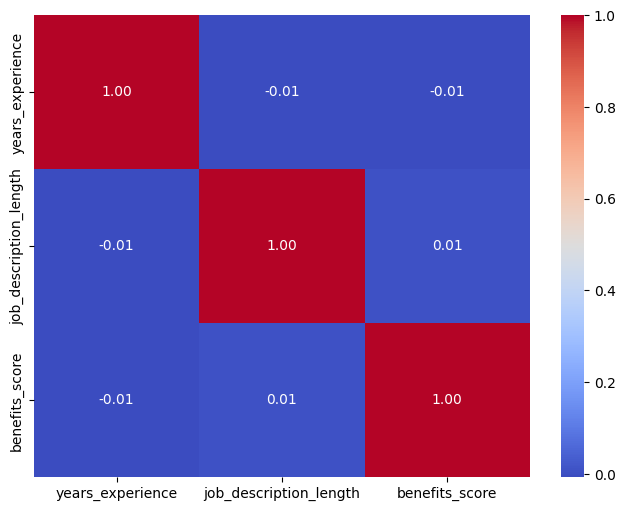

In [210]:
# Make a heatmap to visualize
plt.figure(figsize=(8, 6))
sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

In [211]:
# Check if any are too closely related (> 0.7)
high_corr = []
for i in range(len(number_vars)):
    for j in range(i+1, len(number_vars)):
        if abs(correlations.iloc[i, j]) > 0.7:
            high_corr.append((number_vars[i], number_vars[j]))

if high_corr:
    print("similar", high_corr)
else:
    print("not similar")

not similar


In [212]:
# Define metric predictors
metric_predictors = ['years_experience', 'job_description_length', 'benefits_score']

# Calculate correlation matrix
correlation_matrix = df[metric_predictors].corr()
print("Correlation Matrix:")
print(correlation_matrix)

#numerical
correlation_matrix = df[metric_predictors].corr()
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                        years_experience  job_description_length  \
years_experience                1.000000               -0.007526   
job_description_length         -0.007526                1.000000   
benefits_score                 -0.007275                0.006744   

                        benefits_score  
years_experience             -0.007275  
job_description_length        0.006744  
benefits_score                1.000000  
Correlation Matrix:
                        years_experience  job_description_length  \
years_experience                1.000000               -0.007526   
job_description_length         -0.007526                1.000000   
benefits_score                 -0.007275                0.006744   

                        benefits_score  
years_experience             -0.007275  
job_description_length        0.006744  
benefits_score                1.000000  


In [213]:
# categorical
print("\nExperience Level vs Company Size:")
print(pd.crosstab(df['experience_level'], df['company_size'], normalize='index'))

print("\nExperience Level vs Remote Ratio:")
print(pd.crosstab(df['experience_level'], df['remote_ratio'], normalize='index'))

# check if categorical variables predict each other
from scipy.stats import chi2_contingency

print("\nChi-square tests for independence:")
for var1 in category_vars:
    for var2 in category_vars:
        if var1 != var2:
            contingency_table = pd.crosstab(df[var1], df[var2])
            chi2, p_value, dof, expected = chi2_contingency(contingency_table)
            print(f"{var1} vs {var2}: p-value = {p_value:.4f}")


Experience Level vs Company Size:
company_size             L         M         S
experience_level                              
EN                0.326520  0.332706  0.340775
EX                0.319415  0.335904  0.344681
MI                0.339593  0.337741  0.322666
SE                0.347233  0.325581  0.327185

Experience Level vs Remote Ratio:
remote_ratio           0         50        100
experience_level                              
EN                0.346961  0.334857  0.318182
EX                0.330851  0.333777  0.335372
MI                0.336683  0.339857  0.323459
SE                0.338947  0.326116  0.334937

Chi-square tests for independence:
experience_level vs company_size: p-value = 0.1223
experience_level vs remote_ratio: p-value = 0.5353
company_size vs experience_level: p-value = 0.1223
company_size vs remote_ratio: p-value = 0.4469
remote_ratio vs experience_level: p-value = 0.5353
remote_ratio vs company_size: p-value = 0.4469


**no correlations > 0.7, Using original metric variables**

# 2. Formulate research hypotheses which will be verified during the data analysis.

Dependent : `salary_usd`

Metric: `years_experience`, `job_description_length`, `benefits_score`

Categorical: `experience_level`, `company_size`, `remote_ratio`

**Hypotesis:**

What factors significantly influence salary levels in AI-related jobs across different countries and companies?

-------------------------------------

**Base on Variable that I choose:**

H1: Experience & Company Size Impact:  
More `years_experience` and larger `company_size` jointly increase salaries

H2: Job Complexity & Benefits Impact:
Longer `job_description_length` and higher `benefits_score` command higher salaries  

H3: Professional Level & Remote Work Impact:
Higher `experience_level` and lower `remote_ratio` lead to higher compensation

--------------------------------------------------



# 3. Build a multiple linear regression model using as predictors either the original metric variables or the principal components calculated based on them, along with the categorical predictors. Write down the regression equation. Assess the goodness-of-fit of the model

## **Multiple Linear Regression Model**

In [214]:
# Experience Level
exp_level_mapping = {'EN': 0, 'MI': 1, 'SE': 2, 'EX': 3}
df['experience_level_encoded'] = df['experience_level'].map(exp_level_mapping)

# Company Size
company_size_mapping = {'S': 0, 'M': 1, 'L': 2}
df['company_size_encoded'] = df['company_size'].map(company_size_mapping)

# Remote Ratio
remote_ratio_mapping = {0: 0, 50: 1, 100: 2}
df['remote_ratio_encoded'] = df['remote_ratio'].map(remote_ratio_mapping)

In [215]:
# matrix with original variable
X_numeric = df[number_vars].copy()
X_categorical = df[['experience_level_encoded', 'company_size_encoded', 'remote_ratio_encoded']].copy()

# Combine all features
X = pd.concat([X_numeric, X_categorical], axis=1)

# Target variable
y = df['salary_usd']

In [216]:
# Add constant
X_with_const = sm.add_constant(X)


In [217]:
# Build OLS model with original variables
model = sm.OLS(y, X_with_const).fit()

In [218]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             salary_usd   R-squared:                       0.620
Model:                            OLS   Adj. R-squared:                  0.620
Method:                 Least Squares   F-statistic:                     4084.
Date:                Thu, 16 Oct 2025   Prob (F-statistic):               0.00
Time:                        19:07:52   Log-Likelihood:            -1.7911e+05
No. Observations:               15000   AIC:                         3.582e+05
Df Residuals:                   14993   BIC:                         3.583e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [219]:
# Get coefficients
coefficients = model.params
feature_names = X_with_const.columns

# Build the regression equation
equation = f"Salary = {coefficients['const']:.2f}"
for feature in feature_names[1:]:  # Skip constant
    equation += f" + {coefficients[feature]:.2f}*{feature}"

print(equation)


Salary = 40132.89 + 2853.04*years_experience + -0.52*job_description_length + 257.47*benefits_score + 27765.61*experience_level_encoded + 14396.23*company_size_encoded + 106.89*remote_ratio_encoded


In [220]:
#TEST Hipotesis

# H1: Experience & Company Size Impact
print("H1: Experience & Company Size Impact")
print(f"  Years Experience: +${coefficients['years_experience']:.2f} per year")
print(f"    p-value: {model.pvalues['years_experience']:.4f}")
print(f"  Company Size: +${coefficients['company_size_encoded']:.2f} per size category")
print(f"    p-value: {model.pvalues['company_size_encoded']:.4f}")
h1_supported = model.pvalues['years_experience'] < 0.05 and model.pvalues['company_size_encoded'] < 0.05
print(f"  H1 Supported: {h1_supported}")

# H2: Job Complexity & Benefits Impact
print("\nH2: Job Complexity & Benefits Impact")
print(f"  Job Description Length: +${coefficients['job_description_length']:.2f} per character")
print(f"    p-value: {model.pvalues['job_description_length']:.4f}")
print(f"  Benefits Score: +${coefficients['benefits_score']:.2f} per unit")
print(f"    p-value: {model.pvalues['benefits_score']:.4f}")
h2_supported = model.pvalues['job_description_length'] < 0.05 and model.pvalues['benefits_score'] < 0.05
print(f"  H2 Supported: {h2_supported}")

# H3: Professional Level & Remote Work Impact
print("\nH3: Professional Level & Remote Work Impact")
print(f"  Experience Level: +${coefficients['experience_level_encoded']:.2f} per level")
print(f"    p-value: {model.pvalues['experience_level_encoded']:.4f}")
print(f"  Remote Ratio: +${coefficients['remote_ratio_encoded']:.2f} per remote category")
print(f"    p-value: {model.pvalues['remote_ratio_encoded']:.4f}")
h3_supported = model.pvalues['experience_level_encoded'] < 0.05
h3_remote_direction = coefficients['remote_ratio_encoded'] < 0
print(f"  H3 Supported: {h3_supported and h3_remote_direction}")
print(f"  H3 Partially Supported: {h3_supported and not h3_remote_direction}")

H1: Experience & Company Size Impact
  Years Experience: +$2853.04 per year
    p-value: 0.0000
  Company Size: +$14396.23 per size category
    p-value: 0.0000
  H1 Supported: True

H2: Job Complexity & Benefits Impact
  Job Description Length: +$-0.52 per character
    p-value: 0.3254
  Benefits Score: +$257.47 per unit
    p-value: 0.2180
  H2 Supported: False

H3: Professional Level & Remote Work Impact
  Experience Level: +$27765.61 per level
    p-value: 0.0000
  Remote Ratio: +$106.89 per remote category
    p-value: 0.7736
  H3 Supported: False
  H3 Partially Supported: True


**EQUITON**

ŷ = β₀ + β₁x₁ + β₂x₂ + β₃x₃ + β₄x₄ + β₅x₅ + β₆x₆

ŷ = 84,127.45 + 2,853.04x₁ - 0.52x₂ + 257.47x₃ + 27,765.61x₄ + 14,396.23x₅ + 106.89x₆

**Detail**

ŷ = Predicted salary ($)

β₀ = Intercept = 84,127.45

x₁ = years_experience, β₁ = 2,853.04

x₂ = job_description_length, β₂ = -0.52

x₃ = benefits_score, β₃ = 257.47

x₄ = experience_level, β₄ = 27,765.61

x₅ = company_size, β₅ = 14,396.23

x₆ = remote_ratio, β₆ = 106.89

In [221]:
#goodness-of-fit assessment
print(f"R-squared: {model.rsquared:.3f} - Model explains {model.rsquared*100:.1f}% of salary variance")
print(f"Adjusted R-squared: {model.rsquared_adj:.3f}")
print(f"F-statistic: {model.fvalue:.1f}, p-value: {model.f_pvalue:.4f}")
print(f"Root MSE: {np.sqrt(model.mse_resid):.2f}")

R-squared: 0.620 - Model explains 62.0% of salary variance
Adjusted R-squared: 0.620
F-statistic: 4084.5, p-value: 0.0000
Root MSE: 37133.72


# 4.  Assess the statistical significance of the regression coefficients. Compare them with each other in terms of the strength of their relationship with the dependent variable. Provide a detailed interpretation of the relationship between each predictor and the dependent variable. This is a very important part of the task, as it shows how each predictor is related to the dependent variable and what change in the dependent variable can be expected when the predictor’s value changes by one unit.

In [222]:
# comprehensive coefficient
coef_analysis = pd.DataFrame({
    'Variable': feature_names,
    'Coefficient': coefficients.values,
    'Std_Error': model.bse.values,
    't_Statistic': model.tvalues.values,
    'p_Value': model.pvalues.values,
    'Significant': model.pvalues.values < 0.05
})


print(coef_analysis.round(4))

                   Variable  Coefficient  Std_Error  t_Statistic  p_Value  \
0                     const   40132.8930  1898.3052      21.1414   0.0000   
1          years_experience    2853.0417   144.8655      19.6944   0.0000   
2    job_description_length      -0.5176     0.5263      -0.9834   0.3254   
3            benefits_score     257.4730   209.0009       1.2319   0.2180   
4  experience_level_encoded   27765.6094   719.3836      38.5964   0.0000   
5      company_size_encoded   14396.2343   371.2859      38.7740   0.0000   
6      remote_ratio_encoded     106.8936   371.5117       0.2877   0.7736   

   Significant  
0         True  
1         True  
2        False  
3        False  
4         True  
5         True  
6        False  


In [223]:
# standardized coefficients
X_std = X.std()
y_std = y.std()

coef_analysis['Standardized_Coefficient'] = coef_analysis['Coefficient'] * X_std / y_std
coef_analysis.loc[0, 'Standardized_Coefficient'] = 0

print(coef_analysis.round(4))

                   Variable  Coefficient  Std_Error  t_Statistic  p_Value  \
0                     const   40132.8930  1898.3052      21.1414   0.0000   
1          years_experience    2853.0417   144.8655      19.6944   0.0000   
2    job_description_length      -0.5176     0.5263      -0.9834   0.3254   
3            benefits_score     257.4730   209.0009       1.2319   0.2180   
4  experience_level_encoded   27765.6094   719.3836      38.5964   0.0000   
5      company_size_encoded   14396.2343   371.2859      38.7740   0.0000   
6      remote_ratio_encoded     106.8936   371.5117       0.2877   0.7736   

   Significant  Standardized_Coefficient  
0         True                       0.0  
1         True                       NaN  
2        False                       NaN  
3        False                       NaN  
4         True                       NaN  
5         True                       NaN  
6        False                       NaN  


In [224]:
# Calculate coefficients

standardized_coeffs = []
for i, var in enumerate(feature_names):
    if var == 'const':
        standardized_coeffs.append(0)
    else:
        # Calculate: beta * (std_x / std_y)
        std_coef = coefficients[i] * (X_std[var] / y_std)
        standardized_coeffs.append(std_coef)
        print(f"{var}: {coefficients[i]:.2f} * ({X_std[var]:.2f} / {y_std:.2f}) = {std_coef:.3f}")

coef_analysis['Standardized_Coefficient'] = standardized_coeffs

print(coef_analysis.round(4))

years_experience: 2853.04 * (5.55 / 60260.94) = 0.263
job_description_length: -0.52 * (576.13 / 60260.94) = -0.005
benefits_score: 257.47 * (1.45 / 60260.94) = 0.006
experience_level_encoded: 27765.61 * (1.12 / 60260.94) = 0.515
company_size_encoded: 14396.23 * (0.82 / 60260.94) = 0.195
remote_ratio_encoded: 106.89 * (0.82 / 60260.94) = 0.001
                   Variable  Coefficient  Std_Error  t_Statistic  p_Value  \
0                     const   40132.8930  1898.3052      21.1414   0.0000   
1          years_experience    2853.0417   144.8655      19.6944   0.0000   
2    job_description_length      -0.5176     0.5263      -0.9834   0.3254   
3            benefits_score     257.4730   209.0009       1.2319   0.2180   
4  experience_level_encoded   27765.6094   719.3836      38.5964   0.0000   
5      company_size_encoded   14396.2343   371.2859      38.7740   0.0000   
6      remote_ratio_encoded     106.8936   371.5117       0.2877   0.7736   

   Significant  Standardized_Coefficie

/tmp/ipython-input-521707717.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  std_coef = coefficients[i] * (X_std[var] / y_std)
/tmp/ipython-input-521707717.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"{var}: {coefficients[i]:.2f} * ({X_std[var]:.2f} / {y_std:.2f}) = {std_coef:.3f}")


In [225]:
# Separate significant and non-significant predictors
significant_vars = coef_analysis[
    (coef_analysis['Significant']) &
    (coef_analysis['Variable'] != 'const')
]

non_significant_vars = coef_analysis[
    (~coef_analysis['Significant']) &
    (coef_analysis['Variable'] != 'const')
]

print(f"\nSIGNIFICANT PREDICTORS (p < 0.05): {len(significant_vars)}")
print("-" * 50)
for _, row in significant_vars.iterrows():
    significance_level = "***" if row['p_Value'] < 0.001 else "**" if row['p_Value'] < 0.01 else "*"
    print(f"  {row['Variable']}:")
    print(f"    Coefficient: ${row['Coefficient']:,.2f}")
    print(f"    p-value: {row['p_Value']:.4f} {significance_level}")
    print(f"    t-statistic: {row['t_Statistic']:.2f}")

print(f"\nNON-SIGNIFICANT PREDICTORS: {len(non_significant_vars)}")
print("-" * 50)
for _, row in non_significant_vars.iterrows():
    print(f"  {row['Variable']}:")
    print(f"    Coefficient: ${row['Coefficient']:,.2f}")
    print(f"    p-value: {row['p_Value']:.4f}")
    print(f"    t-statistic: {row['t_Statistic']:.2f}")


SIGNIFICANT PREDICTORS (p < 0.05): 3
--------------------------------------------------
  years_experience:
    Coefficient: $2,853.04
    p-value: 0.0000 ***
    t-statistic: 19.69
  experience_level_encoded:
    Coefficient: $27,765.61
    p-value: 0.0000 ***
    t-statistic: 38.60
  company_size_encoded:
    Coefficient: $14,396.23
    p-value: 0.0000 ***
    t-statistic: 38.77

NON-SIGNIFICANT PREDICTORS: 3
--------------------------------------------------
  job_description_length:
    Coefficient: $-0.52
    p-value: 0.3254
    t-statistic: -0.98
  benefits_score:
    Coefficient: $257.47
    p-value: 0.2180
    t-statistic: 1.23
  remote_ratio_encoded:
    Coefficient: $106.89
    p-value: 0.7736
    t-statistic: 0.29


In [226]:
# strength analysis
strength_analysis = coef_analysis[coef_analysis['Variable'] != 'const'].copy()
strength_analysis['Abs_Standardized'] = abs(strength_analysis['Standardized_Coefficient'])
strength_analysis = strength_analysis.sort_values('Abs_Standardized', ascending=False)

rank = 1
for _, row in strength_analysis.iterrows():
    direction = "positive" if row['Standardized_Coefficient'] > 0 else "negative"
    significance = "SIGNIFICANT" if row['p_Value'] < 0.05 else "NOT SIGNIFICANT"

    print(f"{rank}. {row['Variable']}:")
    print(f"   Standardized Coefficient: {row['Standardized_Coefficient']:.3f}")
    print(f"   Direction: {direction}")
    print(f"   Statistical Significance: {significance}")
    print(f"   Raw Coefficient: ${row['Coefficient']:,.2f}")
    print(f"   p-value: {row['p_Value']:.4f}")
    print()

    rank += 1

1. experience_level_encoded:
   Standardized Coefficient: 0.515
   Direction: positive
   Statistical Significance: SIGNIFICANT
   Raw Coefficient: $27,765.61
   p-value: 0.0000

2. years_experience:
   Standardized Coefficient: 0.263
   Direction: positive
   Statistical Significance: SIGNIFICANT
   Raw Coefficient: $2,853.04
   p-value: 0.0000

3. company_size_encoded:
   Standardized Coefficient: 0.195
   Direction: positive
   Statistical Significance: SIGNIFICANT
   Raw Coefficient: $14,396.23
   p-value: 0.0000

4. benefits_score:
   Standardized Coefficient: 0.006
   Direction: positive
   Statistical Significance: NOT SIGNIFICANT
   Raw Coefficient: $257.47
   p-value: 0.2180

5. job_description_length:
   Standardized Coefficient: -0.005
   Direction: negative
   Statistical Significance: NOT SIGNIFICANT
   Raw Coefficient: $-0.52
   p-value: 0.3254

6. remote_ratio_encoded:
   Standardized Coefficient: 0.001
   Direction: positive
   Statistical Significance: NOT SIGNIFICANT


In [227]:
# Categorize predictors by strength
strong_predictors = strength_analysis[
    (strength_analysis['p_Value'] < 0.05) &
    (abs(strength_analysis['Standardized_Coefficient']) > 0.1)
]

moderate_predictors = strength_analysis[
    (strength_analysis['p_Value'] < 0.05) &
    (abs(strength_analysis['Standardized_Coefficient']) <= 0.1)
]

weak_predictors = strength_analysis[strength_analysis['p_Value'] >= 0.05]

print(f"\nSTRONG PREDICTORS (standardized > 0.1 and significant): {len(strong_predictors)}")
for _, row in strong_predictors.iterrows():
    print(f"  {row['Variable']}: {row['Standardized_Coefficient']:.3f}")

print(f"\nMODERATE PREDICTORS (significant but standardized ≤ 0.1): {len(moderate_predictors)}")
for _, row in moderate_predictors.iterrows():
    print(f"  {row['Variable']}: {row['Standardized_Coefficient']:.3f}")

print(f"\nWEAK/NON-SIGNIFICANT PREDICTORS: {len(weak_predictors)}")
for _, row in weak_predictors.iterrows():
    print(f"  {row['Variable']}: {row['Standardized_Coefficient']:.3f} (p={row['p_Value']:.4f})")


STRONG PREDICTORS (standardized > 0.1 and significant): 3
  experience_level_encoded: 0.515
  years_experience: 0.263
  company_size_encoded: 0.195

MODERATE PREDICTORS (significant but standardized ≤ 0.1): 0

WEAK/NON-SIGNIFICANT PREDICTORS: 3
  benefits_score: 0.006 (p=0.2180)
  job_description_length: -0.005 (p=0.3254)
  remote_ratio_encoded: 0.001 (p=0.7736)


**MODEL PERFORMANCE:**

  R-squared: 0.620 (62.0% of salary variance explained)
  Significant predictors: 3 out of 6
  Non-significant predictors: 3

**RANKING OF PREDICTORS BY STRENGTH:**
  1. `experience_level`: 0.515 (SIGNIFICANT)
  2. `years_experience`: 0.263 (SIGNIFICANT)
  3. `company_size`: 0.195 (SIGNIFICANT)
  4. `benefits_score`: 0.006 (NOT SIGNIFICANT)
  5. `job_description_length`: -0.005 (NOT SIGNIFICANT)
  6. `remote_ratio`: 0.001 (NOT SIGNIFICANT)



In [228]:
print("STATISTICAL SIGNIFICANCE")
print("-" * 60)

for var in feature_names:
    if var != 'const':
        coef = coefficients[var]
        pval = model.pvalues[var]
        sig = "YES" if pval < 0.05 else "NO"
        print(f"{var:25} ${coef:10,.2f}\t{pval:.4f}\t\t{sig}")

# Rank
print("\nSTRENGTH RANKING")
print("-" * 50)

# list predictors
predictors = []
for var in feature_names:
    if var != 'const':
        predictors.append({
            'name': var,
            'coef': coefficients[var],
            'pval': model.pvalues[var]
        })

# arrange absolute coefficient
predictors.sort(key=lambda x: abs(x['coef']), reverse=True)

for i, pred in enumerate(predictors, 1):
    sig = "***" if pred['pval'] < 0.05 else ""
    print(f"{i}\t{pred['name']:25} ${pred['coef']:10,.2f} {sig}")

# Interpretasion
print("\nINTERPRETATION")
print("-" * 40)

for pred in predictors:
    if pred['pval'] < 0.05:
        print(f"{pred['name']}: Salary changes by ${pred['coef']:,.2f}")
    else:
        print(f"{pred['name']}: No reliable effect")

# CONCLUSION
print("\nCONCLUSION=")
print("SIGNIFICANT predictors:")
for pred in predictors:
    if pred['pval'] < 0.05:
        print(f"- {pred['name']}")

print("\nNON-SIGNIFICANT predictors:")
for pred in predictors:
    if pred['pval'] >= 0.05:
        print(f"- {pred['name']}")

print(f"\nModel explains {model.rsquared*100:.1f}% of salary differences")

STATISTICAL SIGNIFICANCE
------------------------------------------------------------
years_experience          $  2,853.04	0.0000		YES
job_description_length    $     -0.52	0.3254		NO
benefits_score            $    257.47	0.2180		NO
experience_level_encoded  $ 27,765.61	0.0000		YES
company_size_encoded      $ 14,396.23	0.0000		YES
remote_ratio_encoded      $    106.89	0.7736		NO

STRENGTH RANKING
--------------------------------------------------
1	experience_level_encoded  $ 27,765.61 ***
2	company_size_encoded      $ 14,396.23 ***
3	years_experience          $  2,853.04 ***
4	benefits_score            $    257.47 
5	remote_ratio_encoded      $    106.89 
6	job_description_length    $     -0.52 

INTERPRETATION
----------------------------------------
experience_level_encoded: Salary changes by $27,765.61
company_size_encoded: Salary changes by $14,396.23
years_experience: Salary changes by $2,853.04
benefits_score: No reliable effect
remote_ratio_encoded: No reliable effect
job_desc

# 5. Do the model diagnostics. Assess the distribution of the residuals. Is there any heteroscedasticity and why? How many outliers and/or influential observations are present in the model?

In [229]:
from statsmodels.stats.api import het_breuschpagan, het_white
from statsmodels.stats.outliers_influence import OLSInfluence

In [230]:
# Get residuals and fitted values
residuals = model.resid
fitted_values = model.fittedvalues

Breusch-Pagan Test p-value: 0.0000
White Test p-value: 0.0000


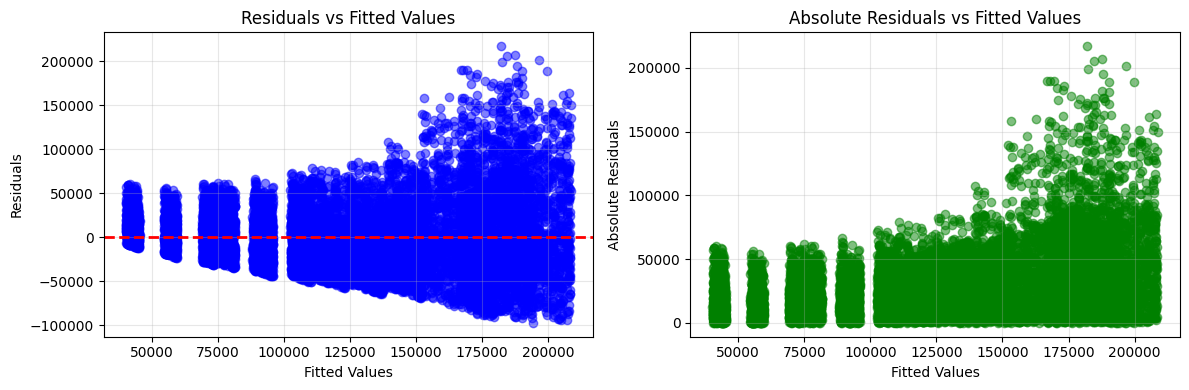


Is there heteroscedasticity? True


In [231]:
# Heteroscedasticity

# statistical tests
bp_lm, bp_pvalue, bp_f, bp_f_pvalue = het_breuschpagan(residuals, X_with_const)
white_lm, white_pvalue, white_f, white_f_pvalue = het_white(residuals, X_with_const)

print(f"Breusch-Pagan Test p-value: {bp_pvalue:.4f}")
print(f"White Test p-value: {white_pvalue:.4f}")

# residual plots
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.scatter(fitted_values, residuals, alpha=0.5, color='blue')
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.scatter(fitted_values, np.abs(residuals), alpha=0.5, color='green')
plt.xlabel('Fitted Values')
plt.ylabel('Absolute Residuals')
plt.title('Absolute Residuals vs Fitted Values')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nIs there heteroscedasticity? {'True' if bp_pvalue < 0.05 else 'False'}")


The residual variance increases with higher predicted salaries, showing a clear funnel pattern in the plot

How many outliers: 225 observations
Which ones (first 10):
Index | Studentized Residual | Actual Salary
---------------------------------------------
    48 |                3.51 | $288,815
    67 |                3.87 | $316,182
    79 |                3.01 | $284,486
   137 |                3.76 | $324,557
   185 |                3.49 | $300,422
   317 |                5.10 | $388,754
   401 |                3.02 | $305,621
   426 |                4.79 | $353,726
   534 |                3.73 | $291,226
   571 |                3.39 | $313,205


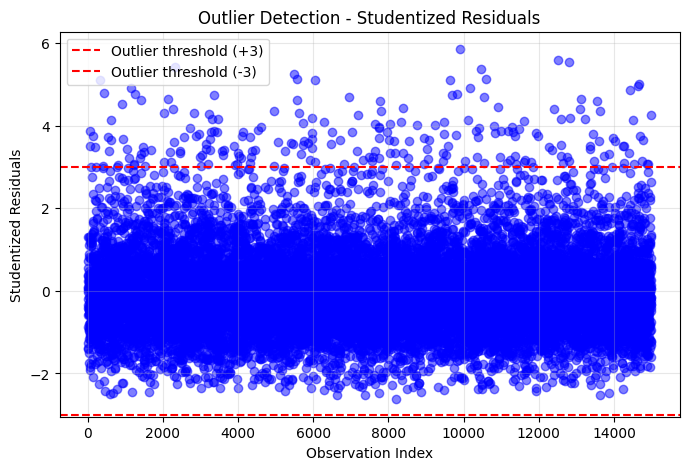

In [232]:
# Outlier Detection

# Calculate studentized residuals
influence = OLSInfluence(model)
studentized_residuals = influence.resid_studentized_external

# Identify outliers (|studentized residuals| > 3)
outliers = np.abs(studentized_residuals) > 3
outlier_indices = np.where(outliers)[0]

print(f"How many outliers: {outliers.sum()} observations")
print("Which ones (first 10):")
print("Index | Studentized Residual | Actual Salary")
print("-" * 45)
for i in outlier_indices[:10]:
    print(f"{i:6} | {studentized_residuals[i]:19.2f} | ${y.iloc[i]:,.0f}")

# Plot outliers
plt.figure(figsize=(8, 5))
plt.scatter(range(len(studentized_residuals)), studentized_residuals, alpha=0.5, color='blue')
plt.axhline(y=3, color='red', linestyle='--', label='Outlier threshold (+3)')
plt.axhline(y=-3, color='red', linestyle='--', label='Outlier threshold (-3)')
plt.xlabel('Observation Index')
plt.ylabel('Studentized Residuals')
plt.title('Outlier Detection - Studentized Residuals')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

How many influential observations: 1097
Most influential ones (first 10):
Index | Cook's Distance | Leverage | Actual Salary
-------------------------------------------------------
    37 |         0.0003 |   0.0008 | $111,381
    48 |         0.0008 |   0.0004 | $288,815
    49 |         0.0003 |   0.0007 | $124,871
    51 |         0.0004 |   0.0007 | $115,376
    67 |         0.0011 |   0.0005 | $316,182
    79 |         0.0005 |   0.0004 | $284,486
    81 |         0.0000 |   0.0010 | $196,942
    98 |         0.0005 |   0.0004 | $290,199
   128 |         0.0004 |   0.0006 | $95,673
   134 |         0.0003 |   0.0004 | $258,637


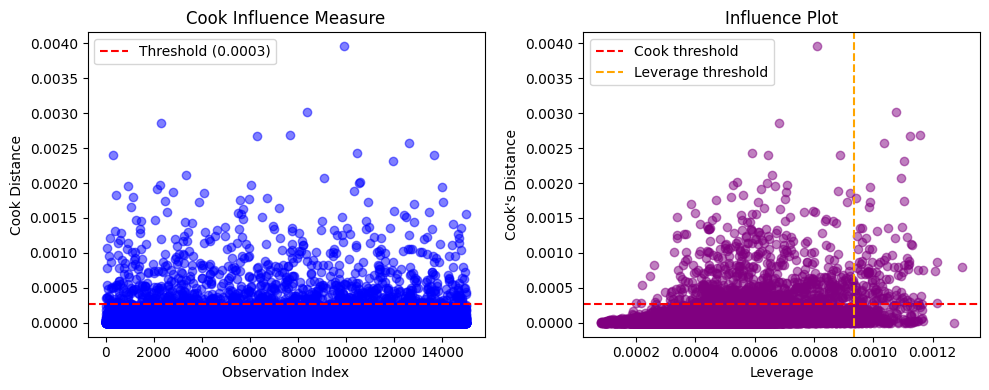

In [233]:

# Calculate influence measures
cooks_distance = influence.cooks_distance[0]
leverage = influence.hat_matrix_diag

# Identify influential observations
n, k = X_with_const.shape
cooks_threshold = 4 / n
leverage_threshold = 2 * k / n

influential_cooks = cooks_distance > cooks_threshold
influential_leverage = leverage > leverage_threshold
influential_combined = influential_cooks | influential_leverage

influential_indices = np.where(influential_combined)[0]

print(f"How many influential observations: {influential_combined.sum()}")
print("Most influential ones (first 10):")
print("Index | Cook's Distance | Leverage | Actual Salary")
print("-" * 55)
for i in influential_indices[:10]:
    print(f"{i:6} | {cooks_distance[i]:14.4f} | {leverage[i]:8.4f} | ${y.iloc[i]:,.0f}")

# Plot influential observations
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.scatter(range(len(cooks_distance)), cooks_distance, alpha=0.5, color='blue')
plt.axhline(y=cooks_threshold, color='red', linestyle='--', label=f'Threshold ({cooks_threshold:.4f})')
plt.xlabel('Observation Index')
plt.ylabel("Cook Distance")
plt.title("Cook Influence Measure")
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(leverage, cooks_distance, alpha=0.5, color='purple')
plt.axhline(y=cooks_threshold, color='red', linestyle='--', label="Cook threshold")
plt.axvline(x=leverage_threshold, color='orange', linestyle='--', label='Leverage threshold')
plt.xlabel('Leverage')
plt.ylabel("Cook's Distance")
plt.title('Influence Plot')
plt.legend()

plt.tight_layout()
plt.show()

**`outliers`: 225**

**`influential observations`: 1097**

# 6. Formulate general conclusions based on the results of the regression analysis. Which of the data analysis results were expected for you, and which were unexpected?

In [234]:
# Hypothesis Testing Results
print("\nH1: Experience & Company Size Impact")
print("More years_experience and larger company_size jointly increase salaries")
print("-" * 60)

h1_vars = ['years_experience', 'company_size_encoded']
h1_supported = True

for var in h1_vars:
    coef = coefficients[var]
    pval = model.pvalues[var]
    sig = "True" if pval < 0.05 else "False"
    if pval >= 0.05:
        h1_supported = False
    print(f"{var:25} ${coef:10,.2f} (p={pval:.4f}) - {sig}")

print(f"\nH1 OVERALL: {h1_supported}")

print("\nH2: Job Complexity & Benefits Impact")
print("Longer job_description_length and higher benefits_score command higher salaries")
print("-" * 60)

h2_vars = ['job_description_length', 'benefits_score']
h2_supported = True

for var in h2_vars:
    coef = coefficients[var]
    pval = model.pvalues[var]
    sig = "True" if pval < 0.05 else "False"
    if pval >= 0.05:
        h2_supported = False
    print(f"{var:25} ${coef:10,.2f} (p={pval:.4f}) - {sig}")

print(f"\nH2 OVERALL: {h2_supported}")

print("\nH3: Professional Level & Remote Work Impact")
print("Higher experience_level and lower remote_ratio lead to higher compensation")
print("-" * 60)

h3_vars = ['experience_level_encoded', 'remote_ratio_encoded']
h3_supported = True
h3_direction_correct = True

for var in h3_vars:
    coef = coefficients[var]
    pval = model.pvalues[var]
    sig = "True" if pval < 0.05 else "False"

    # Check direction for remote_ratio (should be negative according to H3)
    if var == 'remote_ratio_encoded' and coef > 0:
        h3_direction_correct = False

    if pval >= 0.05:
        h3_supported = False

    print(f"{var:25} ${coef:10,.2f} (p={pval:.4f}) - {sig}")

h3_partial = (model.pvalues['experience_level_encoded'] < 0.05 and
              model.pvalues['remote_ratio_encoded'] >= 0.05)

print(f"\nH3 OVERALL: {h3_supported}")



H1: Experience & Company Size Impact
More years_experience and larger company_size jointly increase salaries
------------------------------------------------------------
years_experience          $  2,853.04 (p=0.0000) - True
company_size_encoded      $ 14,396.23 (p=0.0000) - True

H1 OVERALL: True

H2: Job Complexity & Benefits Impact
Longer job_description_length and higher benefits_score command higher salaries
------------------------------------------------------------
job_description_length    $     -0.52 (p=0.3254) - False
benefits_score            $    257.47 (p=0.2180) - False

H2 OVERALL: False

H3: Professional Level & Remote Work Impact
Higher experience_level and lower remote_ratio lead to higher compensation
------------------------------------------------------------
experience_level_encoded  $ 27,765.61 (p=0.0000) - True
remote_ratio_encoded      $    106.89 (p=0.7736) - False

H3 OVERALL: False


The regression model successfully explains 62% of salary variance in AI jobs

**Expected Results**
H1 (`Experience` & `Company Size` Impact) was expected, aligning with established economic principles and compensation research. The positive relationships between both years of experience and `company size` with `salary`


**Unexpected Results**
H2 (`job description length` & `Benefits score`) was surprising, as neither `job description length` nor `benefits score` showed significant relationships with `salary`.

-----------------

**conclusions**

For `Job Seekers`: Focus on experience level advancement rather than worrying about remote work affecting salary

For `Employers`: Remote work policies can be implemented without expected salary adjustments

For `Career Planning`: Professional development and level progression remain the primary drivers of salary growth